In [1]:
# -*- coding: utf-8 -*-
import os
import pandas as pd
import numpy as np
import join
import csv
import sys
import jieba
import time
import jieba.analyse
import jieba.posseg as pseg
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from tkinter import _flatten
import pickle
from PIL import Image
import matplotlib.pyplot as plt
print("【訊息】目前的工作目錄:",os.getcwd())

【訊息】目前的工作目錄: C:\Mypython\專題


### 範例

In [ ]:
a =[1,2,3,4,1,2]
c = ['This','is','a','random','string','!']
df = pd.DataFrame({'A':a,'C':c})
df

In [ ]:
QQ = df.groupby('A')['C'].apply(lambda x: "%s" % ''.join(x))
QQ

In [ ]:
QQ = list(QQ)
QQ

### 實作-資料清理與分群

In [2]:
#開啟欄位到最大，方便 pandas 匯入檔案
csv.field_size_limit(int(sys.maxsize/10000000000))

131072

In [25]:
#檔案的匯入
df=pd.read_csv(r'C:\Mypython\專題\deal(469mb;546Krows)_0605v5.csv', sep=',', engine='python',encoding='utf_8_sig')

In [26]:
df.shape

(546216, 44)

In [27]:
df.columns

Index(['business_hour_guid', 'seller_GUID', 'business_hour_order_time_s',
       'business_hour_order_time_e', 'business_hour_deliver_time_s',
       'business_hour_deliver_time_e', 'pic_alt', 'zip_code', 'city_name',
       'district_name', 'item_name', 'item_orig_price', 'item_price',
       'item_default_daily_amount', 'event_name', 'event_title',
       'product_spec', 'shopping_cart', 'combo_pack_count',
       'quantity_multiplier', 'city_list', 'deal_acc_business_group_id',
       'acc_business_group_name', 'deal_type', 'is_travel_deal',
       'installment_3months', 'installment_6months', 'installment_12months',
       'deny_installment', 'shippingdate', 'is_long_contract',
       'develope_sales_id', 'operation_sales_id', 'slug', 'ordered_quantity',
       'ordered_total', 'category_list', 'freight_amount', 'enable_isp',
       'discount_price', 'is_wms', 'ancestor_business_hour_guid', 'code_name',
       'code'],
      dtype='object')

In [28]:
df.groupby('code').size()

KeyError: 'newCode'

In [7]:
df.head(2)

,business_hour_guid,seller_GUID,business_hour_order_time_s,business_hour_order_time_e,business_hour_deliver_time_s,business_hour_deliver_time_e,pic_alt,zip_code,city_name,district_name,...,ordered_total,category_list,freight_amount,enable_isp,discount_price,is_wms,ancestor_business_hour_guid,code_name,code,newCode
0,29B37E53-021C-48E9-909E-C6C151974AC7,EC5DDAD4-F8F8-418B-8AED-7BAC2553F2B6,00:00.0,00:00.0,00:00.0,00:59.0,柯絲妃兒/胎盤素/肌因賦活/身體精華乳,407,台中市,西屯區,...,0,[88|221|124|769|136|139],0,0,NaN,0,NaN,美體私密,5821.0,5821
1,2C6E83A9-9785-4593-A759-07A78AB309BB,B6CC8A1E-37C8-44E5-B6E2-15123387AF95,00:00.0,00:00.0,00:00.0,00:59.0,aibo 領導者/ 立體聲/智慧藍牙/耳機麥克風系列,243,新北市,泰山區,...,0,[88|221|117|2179|2180|100105|100106|136|139],0,0,NaN,0,NaN,網路設備/穿戴裝置/辦公設備,222.0,505771


In [29]:
# 匯入停用詞庫，放進list
stopword =[]
for i in open(r'C:\Mypython\專題\停用.txt') :
    stopword.append(i.rstrip())

In [30]:
# 轉化欄為型態
df['item_name'] = df['item_name'].astype('str')

In [31]:
df['code_name'] = df['code_name'].astype('str').apply(lambda x:x.replace('/',''))

In [32]:
# 將資料去除停用詞
def clearword(x):
    l = []
    out =''
    l = jieba.cut(x)
    for j in l:
        if j not in stopword:
            out = out+j
    return out

In [33]:
# 清理
df['item_name'] = df['item_name'].apply(lambda x:x.replace(' ','').replace('(','').replace(')','').replace('|',''))

In [34]:
# 停用詞去除
df['item_name'] = df['item_name'].apply(clearword)

In [ ]:
def clearword2(x):
    out =''
    p = ['m','q','a']
    words = pseg.cut(x)
    for i in words:
        if i.flag not in p:
            out = out+i.word
    return out

In [ ]:
%%time

df['item_name'] = df['item_name'].apply(clearword2)

In [ ]:
df['item_name'].to_csv(r"D:\MyPython\專題\clearword2.csv", encoding='utf_8_sig')

In [35]:
# 2個欄位結合
df['name'] = df['item_name']+df['code_name']

In [36]:
df['name']

0                       柯絲妃兒胎盤素肌因賦活身體精華乳美體私密
1                領導者立體聲智慧藍牙耳機麥克風網路設備穿戴裝置辦公設備
2                領導者立體聲智慧藍牙耳機麥克風網路設備穿戴裝置辦公設備
3                領導者立體聲智慧藍牙耳機麥克風網路設備穿戴裝置辦公設備
4                領導者立體聲智慧藍牙耳機麥克風網路設備穿戴裝置辦公設備
5                領導者立體聲智慧藍牙耳機麥克風網路設備穿戴裝置辦公設備
6                          黑橋牌香腸原味蒜味即食調理熟食小吃
7                          黑橋牌香腸原味蒜味即食調理熟食小吃
8                          黑橋牌香腸原味蒜味即食調理熟食小吃
9                          黑橋牌香腸原味蒜味即食調理熟食小吃
10                         黑橋牌香腸原味蒜味即食調理熟食小吃
11                             水林號冰心地瓜農產蔬菜水果
12                 膳魔師超輕量鏽鋼真空保溫杯保溫生活百貨衛浴設備用品
13                                 匯鮮鮭魚生鮮肉品蛋
14                   拳擊有氧健身特厚多功能拳擊沙袋健身器材測量器材
15                   拳擊有氧健身直立式拳擊球拳擊座健身器材測量器材
16                   拳擊有氧健身特厚多功能拳擊沙袋健身器材測量器材
17             拳擊有氧健身特厚多功能拳擊沙袋半指拳擊手套健身器材測量器材
18                     尚順育樂一票暢遊尚順晴天雨天玩HIGH門票
19                                尚順育樂門票四張門票
20             拳擊有氧健身直立式拳擊球拳擊座競技拳擊手套健身器材測量器材
21        iPhone7iPhone7plus0.28超薄軟殼電腦平板手機配件
22        

In [37]:
# 同類別的groupby在一起
Join_name = df.groupby('code')['item_name'].apply(lambda x: "%s" % ''.join(x))

In [38]:
Join_name = list(Join_name)

In [39]:
Join_name[0]

"1350元含運費即可購得2690元HONEYWELL空氣循環扇HT380BPTWN999元即可購得空運來台華盛頓西北櫻桃禮盒2100元一次購買組可享免運費299元即可享用異色引誘戀豆坊680元時cafetasse七夕珍珠禮盒乙盒279元即可購買訂價390元L’EGERE零毛孔冰鎮化粧水化妝棉1350元即可購得2700喝牛奶長卓蘭新興梨15A禮盒一次購買兩組享免運費送禮自用兩相宜1350元即可購得2700喝牛奶長卓蘭新興梨15A禮盒一次購買兩組享免運費送禮自用兩相宜999元即可購得1800元喝牛奶長卓蘭新興梨12A禮盒一次購買兩組享免運費送禮自用兩相宜650元即可購買季洋咖啡豆1500元RSW牙買加藍山NO.1咖啡豆磅一次購買磅還可享免運費喔999元即可購得3280元御廚跨海監製代官山觀月集碳火燒肉套餐組再699白湯鍋物~此證即可購買4200元BRITA馬力拉MarellaXL3.5濾水壺濾芯入共入濾芯此證即享CAS優良廠商富統食品599元烤肉趣歡樂賞月套餐梅花豬肉片紐澳良翅小腿雞心串秋刀魚培根蔗香香腸黑輪吐司金針菇礦泉水一次到位烤肉免煩惱此證即可購得3280元御廚跨海監製代官山觀月集碳火燒肉套餐組再699白湯鍋物~此證即可購買690元雞蛋農場法式蛋殼烤布蕾顆含運費大媒體強力推薦299元即可購得625元元祖雪餅乙盒好個秋~雪月餅巧克力芒果草莓目雪餅269元即可購買450元BeautyFoot7天厚角質足膜乙盒兩枚女用男~回歸白嫩美足258元即可購得單日上千團購聖品458元瓜甜裡巷原味冬瓜蜜乙組600CC28500元即可購買32900元LG42吋液晶電視42LD450單機含安裝34500元即可購買39900元VIZIO42吋FullHD液晶電視SV421XVTT單機含安裝999元即可購得1500元來生凍帝王蟹乙份享受前所未有超大滿足~999元即可購得1500元來生凍帝王蟹乙份享受前所未有超大滿足~680元即可購得1280元MARIO名車賞BMWX6遙控車680元即可購得1280元MARIO名車賞BMWX6遙控車680元即可購得1280元MARIO名車賞BMWX6遙控車封館348元即可購得PayEasyBioBeautyQ10金緻美顏活膚珍珠580元抗皺緊緻活膚抗老化一次完成~1999元即可購得2999元LEGO樂高寶湯瑪士火車ThomasStarterSet實現孩子夢

In [40]:
df_Join_name = pd.DataFrame(Join_name)

In [41]:
df_Join_name.columns = ['Join_name']
df_Join_name

,Join_name
0,1350元含運費即可購得2690元HONEYWELL空氣循環扇HT380BPTWN999元即...
1,芝麻街夏日鋁箔壓花涼墊L號芝麻街夏日鋁箔壓花涼墊L號芝麻街夏日鋁箔壓花涼墊M號芝麻街夏日鋁箔...
2,HAPPYHOUSE矽藻土寵物乾洗噴霧HAPPYHOUSE矽藻土寵物乾洗噴霧HAPPYHOU...
3,寵物柔順護膚抗菌噴霧寵物柔順護膚抗菌噴霧寵物柔順護膚抗菌噴霧寵物柔順護膚抗菌噴霧寵物多功能沐...
4,BABYTIGER遊戲爬行巧拼地墊莊園BABYTIGER遊戲爬行巧拼地墊莊園BABYTIGE...
5,韓版休閒百搭多口袋雙肩背包韓版休閒百搭多口袋雙肩背包韓版休閒百搭多口袋雙肩背包韓版休閒百搭多...
6,韓版防潑水旅行折疊背包行李可套拉桿單肩包韓版防潑水旅行折疊背包行李可套拉桿單肩包韓版防潑水旅...
7,鑽石甜心ABS霧面行李箱吋鑽石甜心ABS霧面行李箱吋鑽石甜心ABS霧面行李箱鑽石甜心ABS霧...
8,大容量摺疊掛勾收納包大容量摺疊掛勾收納包大容量摺疊掛勾收納包大容量摺疊掛勾收納包大容量摺疊掛...
9,超廣角微距鏡頭超廣角微距鏡頭超廣角微距鏡頭0.45X超廣角微距鏡頭超廣角微距鏡頭超廣角微距鏡...


In [42]:
df_Join_name.to_csv(r"C:\MyPython\專題\Join-name3.csv", encoding='utf_8_sig')

### tf-idf 進行數字化

In [3]:
df2=pd.read_csv(r'C:\Mypython\專題\Join-name5(周周版).csv', sep=',', engine='python',encoding='utf_8_sig')

In [4]:
# 結巴切段
def word_cut(mytext):
    return list(jieba.cut(mytext))

In [5]:
# 資料型態轉換
df2['Join_name'] = df2['Join_name'].astype('str')

In [6]:
df2['content_cutted'] = df2['Join_name'].apply(word_cut)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Student\AppData\Local\Temp\jieba.cache
Loading model cost 0.984 seconds.
Prefix dict has been built succesfully.


In [7]:
df2['content_cutted']

0      [1350, 元含, 運費, 即可, 購得, 2690, 元, HONEYWELL, 空氣,...
1      [芝麻街, 夏日, 鋁箔, 壓花涼, 墊, L, 號, 芝麻街, 夏日, 鋁箔, 壓花涼, ...
2      [HAPPYHOUSE, 矽藻, 土寵物, 乾洗, 噴霧, HAPPYHOUSE, 矽藻, ...
3      [寵物柔, 順護膚, 抗菌, 噴霧, 寵物柔, 順護膚, 抗菌, 噴霧, 寵物柔, 順護膚,...
4      [BABYTIGER, 遊戲, 爬行, 巧拼地, 墊, 莊園, BABYTIGER, 遊戲,...
5      [韓版休, 閒百搭多, 口袋, 雙肩, 背包, 韓版休, 閒百搭多, 口袋, 雙肩, 背包,...
6      [韓版, 防潑, 水, 旅行, 折疊, 背包, 行李, 可套, 拉桿, 單肩包, 韓版, 防...
7      [鑽石, 甜心, ABS, 霧面, 行李箱, 吋, 鑽石, 甜心, ABS, 霧面, 行李箱...
8      [大容量, 摺, 疊掛, 勾, 收納包, 大容量, 摺, 疊掛, 勾, 收納包, 大容量, ...
9      [超廣角, 微距, 鏡頭, 超廣角, 微距, 鏡頭, 超廣角, 微距, 鏡頭, 0.45, ...
10     [COOLPON, 高清, 光學, 玻璃, 特效, 鏡頭, COOLPON, 高清, 光學,...
11     [LED, 炫光夜, 跑鞋, 帶, LED, 炫光夜, 跑鞋, 帶, LED, 炫光夜, 跑...
12     [免鑽孔, 伸縮, 自動, 扣, 皮帶, 條免, 鑽孔, 伸縮, 自動, 扣皮, 帶免, 鑽...
13     [3C, 保暖, 螢幕, 觸控, 手套, 型, 3C, 保暖, 螢幕, 觸控, 手套, 3C...
14     [夏日, 兩戴防, 曬, 夏日, 兩戴防, 曬, 夏日, 兩戴防, 曬, 夏日, 兩戴, 防...
15     [防風, 保暖, 護頸, 耳, 口罩, 防風, 保暖, 護頸, 耳, 口罩, 防風, 保暖,...
16     [高清, 近視, 太陽, 運動風, 眼鏡, 單鏡款, 高清, 近視, 太陽, 運動風, 眼鏡...
17     [超, 超自然, U, 型, 髮, 超, 超自然

In [8]:
df_Join_name_count = pd.Series([Counter(x) for x in df2['content_cutted']],index=df2['Join_name'].index)

In [9]:
df_Join_name_count.iloc[:5]

0    {'1350': 5, '元含': 3, '運費': 49, '即可': 186, '購得'...
1    {'芝麻街': 21, '夏日': 40, '鋁箔': 24, '壓花涼': 14, '墊'...
2    {'HAPPYHOUSE': 5, '矽藻': 5, '土寵物': 5, '乾洗': 5, ...
3    {'寵物柔': 4, '順護膚': 4, '抗菌': 10, '噴霧': 6, '寵物': ...
4    {'BABYTIGER': 3, '遊戲': 3, '爬行': 3, '巧拼地': 3, '...
dtype: object

In [10]:
dictionary = Dictionary(list(df_Join_name_count))

In [11]:
# 儲存dictionary
with open('dictionary.pickle', 'wb') as handle:
    pickle.dump(dictionary, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# 載回dictionary
with open('dictionary.pickle', 'rb') as handle:
    dictionary2 = pickle.load(handle)

In [12]:
code_tokenGybow = pd.Series([dictionary.doc2bow(x) for x in df_Join_name_count],index=df2['Join_name'].index)

In [13]:
code_tokenGybow.iloc[:5]

0    [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1...
1    [(2, 1), (38, 1), (240, 1), (718, 1), (725, 1)...
2    [(1514, 1), (2191, 1), (2448, 1), (2460, 1), (...
3    [(2460, 1), (2643, 1), (2834, 1), (2958, 1), (...
4    [(2588, 1), (5277, 1), (7102, 1), (7972, 1), (...
dtype: object

In [14]:
# 進行Tfidf計算
tfidf = TfidfModel(code_tokenGybow)
code_tokenGyTfidf = pd.Series(tfidf[code_tokenGybow],index=df2['Join_name'].index)
code_tokenGyTfidf.iloc[:5]

0    [(0, 0.0036420073360595067), (1, 0.00359013500...
1    [(2, 0.016913040381532893), (38, 0.02753104033...
2    [(1514, 0.06781772889610431), (2191, 0.0761729...
3    [(2460, 0.10206977711926789), (2643, 0.0471704...
4    [(2588, 0.15620486421966723), (5277, 0.4428786...
dtype: object

In [15]:
# 排序Tfidf結果，並且取權重排名50%以上的關鍵字
code_tokenGyTfidfSort = pd.Series(map( lambda x: sorted(x,key=lambda w: w[1],reverse=True),code_tokenGyTfidf),
                                  index=df2['Join_name'].index)
code_tokenGyTfidfSort.iloc[:5]

0    [(3, 0.012429135246581338), (10, 0.01242913524...
1    [(8965, 0.04403264231484698), (8968, 0.0440326...
2    [(9524, 0.19831416891152948), (9525, 0.1983141...
3    [(9541, 0.2759084473553572), (9542, 0.27590844...
4    [(9551, 0.5322606388331247), (9552, 0.50191287...
dtype: object

In [16]:
code_tokenGyTfidfSort2 = pd.Series(map( lambda x: x[:len(x)//2],code_tokenGyTfidfSort),
                                   index=df2['Join_name'].index)
code_tokenGyTfidfSort2[:5]

0    [(3, 0.012429135246581338), (10, 0.01242913524...
1    [(8965, 0.04403264231484698), (8968, 0.0440326...
2    [(9524, 0.19831416891152948), (9525, 0.1983141...
3    [(9541, 0.2759084473553572), (9542, 0.27590844...
4    [(9551, 0.5322606388331247), (9552, 0.50191287...
dtype: object

In [17]:
code_tokenGyTfidfSort3 = pd.Series(map( lambda x: list(map( lambda y: y[0]  ,x)),
                                       code_tokenGyTfidfSort),index=df2['Join_name'].index)

In [18]:
code_tokenGyTfidfSort5 = pd.DataFrame(data = {'tokens':code_tokenGyTfidfSort3})

In [19]:
code_tokenGyTfidfSort5

,tokens
0,"[3, 10, 13, 14, 16, 17, 18, 22, 23, 25, 26, 27..."
1,"[8965, 8968, 8969, 8970, 8971, 8972, 8974, 897..."
2,"[9524, 9525, 9526, 9528, 9529, 9530, 9531, 953..."
3,"[9541, 9542, 9543, 9544, 9546, 9549, 9550, 925..."
4,"[9551, 9552, 5277, 7102, 7972, 2588]"
5,"[9555, 9556, 9557, 9559, 9561, 9566, 9567, 957..."
6,"[9637, 9639, 9640, 9641, 9642, 9643, 9646, 964..."
7,"[9751, 9753, 9756, 9757, 9768, 9773, 9776, 977..."
8,"[9840, 9842, 9843, 9844, 9849, 9851, 9860, 986..."
9,"[9878, 9882, 9884, 9885, 9902, 9905, 9877, 988..."


In [20]:
code_tokenGyTfidfSort5.to_csv(r"C:\MyPython\專題\特徵資料.csv",index=False)

In [21]:
df3=pd.read_csv(r'C:\Mypython\專題\特徵資料.csv', engine='python',encoding='utf_8_sig')

In [22]:
df4 = df3['tokens'].apply(lambda x :x.replace('[','').replace(']','').split(','))

In [49]:
def toInt(x):
    return int(x.strip())


code_tokenGyTfidfSort4 = list(map( lambda x : list(map( toInt  ,x))     ,df4))

In [50]:
len(code_tokenGyTfidfSort4)

466

### 文字雲

In [24]:
font = r'msjh.ttc'

In [113]:
mask = np.array(Image.open(r"D:\Mypython\專題\4f214bf79af1369fa548b0d6a0eb2396.png"))

In [114]:
my_wordcloud = WordCloud(background_color="white",mask=mask,
                         font_path=font,collocations=False, 
                         width=3400, height=3400, margin=2)  

In [115]:
my_wordcloud.generate_from_frequencies(df_Join_name_count[23])

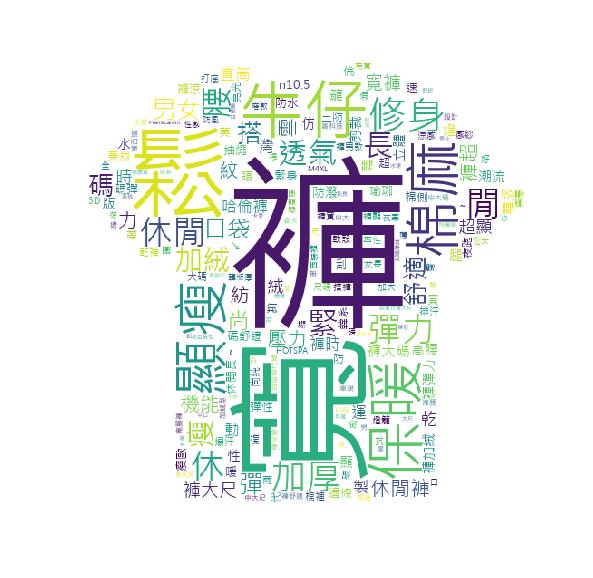

In [116]:
plt.figure(figsize=(10,10))
plt.imshow(my_wordcloud)
plt.axis('off')
plt.show()

### 對資料做轉化

In [43]:
df['content_cutted'] = df['item_name'].apply(word_cut)

In [44]:
content_cutted = pd.Series([dictionary.doc2bow(x) for x in df['content_cutted']])

In [45]:
content_cutted[:5]

0    [(5708, 1), (7836, 1), (48861, 1), (65265, 1),...
1    [(4012, 1), (8871, 1), (21609, 1), (21873, 1),...
2    [(4012, 1), (8871, 1), (21609, 1), (21873, 1),...
3    [(4012, 1), (8871, 1), (21609, 1), (21873, 1),...
4    [(4012, 1), (8871, 1), (21609, 1), (21873, 1),...
dtype: object

In [46]:
content_cutted2 = pd.Series(map( lambda x: list(map( lambda y: y[0]  ,x)),
                                       content_cutted))
content_cutted2[:5]

0    [5708, 7836, 48861, 65265, 65574, 65931, 130656]
1                   [4012, 8871, 21609, 21873, 22432]
2                   [4012, 8871, 21609, 21873, 22432]
3                   [4012, 8871, 21609, 21873, 22432]
4                   [4012, 8871, 21609, 21873, 22432]
dtype: object

### 特徵欄位

In [52]:
def word(x):
    stroke = []
    for i in range(0,len(code_tokenGyTfidfSort4)):    
        stroke.append(len(set(x)&set(code_tokenGyTfidfSort4[i])))
    return(stroke)

In [35]:
%%time
BB = []
BB.append(list(content_cutted2[:1].apply(word)))

Wall time: 27 ms


In [36]:
BB

[[[0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   2,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   1,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   2,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   2,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   1,
   2,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   2,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   6,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0

In [53]:
AA = []
AA.append(list(content_cutted2.apply(word)))

In [54]:
df_AA = pd.DataFrame(AA[0])

In [55]:
df_AA['code'] = df['code']

In [56]:
df_AA.to_csv(r"C:\MyPython\專題\答5.csv")